In [ ]:
!pip install textblob
!pip install nltk
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


Text: I love this product! It's amazing.
Sentiment: Positive | Emotion: Joy
-----
Text: I'm feeling really sad today.
Sentiment: Negative | Emotion: Sadness
-----
Text: The service was okay, nothing special.
Sentiment: Negative | Emotion: Sadness
-----
Text: Why is everything going wrong?
Sentiment: Negative | Emotion: Sadness
-----
Text: That movie was a fantastic experience!
Sentiment: Positive | Emotion: Joy
-----


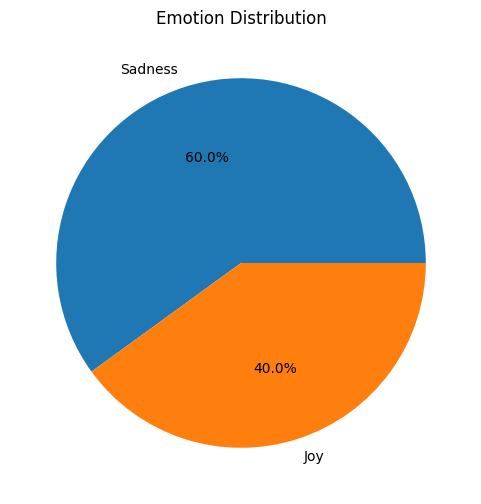

In [ ]:
# Import libraries
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Sample tweets or social media posts
texts = [
    "I love this product! It's amazing.",
    "I'm feeling really sad today.",
    "The service was okay, nothing special.",
    "Why is everything going wrong?",
    "That movie was a fantastic experience!"
]

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Prepare results list
results = []

# Analyze each text
for text in texts:
    # TextBlob analysis
    blob = TextBlob(text)
    tb_sentiment = blob.sentiment.polarity

    # VADER analysis
    vader_score = vader.polarity_scores(text)['compound']

    # Determine sentiment label (simple logic)
    if vader_score >= 0.05:
        sentiment = "Positive"
        emotion = "Joy"
    elif vader_score <= -0.05:
        sentiment = "Negative"
        emotion = "Sadness"
    else:
        sentiment = "Neutral"
        emotion = "Surprise"

    results.append({"Text": text, "Sentiment": sentiment, "Emotion": emotion})

# Display results
for r in results:
    print(f"Text: {r['Text']}")
    print(f"Sentiment: {r['Sentiment']} | Emotion: {r['Emotion']}")
    print("-----")

# Visualization
labels = [r['Emotion'] for r in results]
plt.figure(figsize=(6,6))
plt.pie([labels.count(e) for e in set(labels)], labels=set(labels), autopct='%1.1f%%')
plt.title("Emotion Distribution")
plt.show()
